In [1]:
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import decode_predictions
from keras.models import Model, load_model
import keras.backend as K

import model as tcav_model
import tcav as tcav
import utils as utils
import activation_generator as act_gen
import tensorflow as tf
import utils_plot as utils_plot


from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from numpy.linalg import norm

import pickle
#from bunch import bunchify

import cav as cav

from os import listdir
from os.path import isfile, join
import operator
from PIL import Image
from keras.preprocessing import image

import os



/data/anaconda/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [123]:
model = None
model = load_model('v3_model.h5')

Level 1:tensorflow:Created variable batch_normalization_1_1/moving_mean/biased:0 with shape <unknown> and init Tensor("batch_normalization_1_1/AssignMovingAvg/batch_normalization_1_1/moving_mean/zeros:0", shape=(32,), dtype=float32)
Level 1:tensorflow:Created variable batch_normalization_1_1/moving_mean/local_step:0 with shape () and init <tensorflow.python.ops.init_ops.Zeros object at 0x7f2e5dfb7be0>
Level 1:tensorflow:Created variable batch_normalization_1_1/moving_variance/biased:0 with shape <unknown> and init Tensor("batch_normalization_1_1/AssignMovingAvg_1/batch_normalization_1_1/moving_variance/zeros:0", shape=(32,), dtype=float32)
Level 1:tensorflow:Created variable batch_normalization_1_1/moving_variance/local_step:0 with shape () and init <tensorflow.python.ops.init_ops.Zeros object at 0x7f2e5df68a90>
Level 1:tensorflow:Created variable batch_normalization_2_1/moving_mean/biased:0 with shape <unknown> and init Tensor("batch_normalization_2_1/AssignMovingAvg/batch_normalizati

Level 1:tensorflow:Created variable batch_normalization_11_1/moving_mean/biased:0 with shape <unknown> and init Tensor("batch_normalization_11_1/AssignMovingAvg/batch_normalization_11_1/moving_mean/zeros:0", shape=(96,), dtype=float32)
Level 1:tensorflow:Created variable batch_normalization_11_1/moving_mean/local_step:0 with shape () and init <tensorflow.python.ops.init_ops.Zeros object at 0x7f2e5d5965f8>
Level 1:tensorflow:Created variable batch_normalization_11_1/moving_variance/biased:0 with shape <unknown> and init Tensor("batch_normalization_11_1/AssignMovingAvg_1/batch_normalization_11_1/moving_variance/zeros:0", shape=(96,), dtype=float32)
Level 1:tensorflow:Created variable batch_normalization_11_1/moving_variance/local_step:0 with shape () and init <tensorflow.python.ops.init_ops.Zeros object at 0x7f2e5d5cc438>
Level 1:tensorflow:Created variable batch_normalization_12_1/moving_mean/biased:0 with shape <unknown> and init Tensor("batch_normalization_12_1/AssignMovingAvg/batch_n

Level 1:tensorflow:Created variable batch_normalization_21_1/moving_mean/biased:0 with shape <unknown> and init Tensor("batch_normalization_21_1/AssignMovingAvg/batch_normalization_21_1/moving_mean/zeros:0", shape=(48,), dtype=float32)
Level 1:tensorflow:Created variable batch_normalization_21_1/moving_mean/local_step:0 with shape () and init <tensorflow.python.ops.init_ops.Zeros object at 0x7f2e5cbe7320>
Level 1:tensorflow:Created variable batch_normalization_21_1/moving_variance/biased:0 with shape <unknown> and init Tensor("batch_normalization_21_1/AssignMovingAvg_1/batch_normalization_21_1/moving_variance/zeros:0", shape=(48,), dtype=float32)
Level 1:tensorflow:Created variable batch_normalization_21_1/moving_variance/local_step:0 with shape () and init <tensorflow.python.ops.init_ops.Zeros object at 0x7f2e5cb9a198>
Level 1:tensorflow:Created variable batch_normalization_24_1/moving_mean/biased:0 with shape <unknown> and init Tensor("batch_normalization_24_1/AssignMovingAvg/batch_n

Level 1:tensorflow:Created variable batch_normalization_35_1/moving_mean/biased:0 with shape <unknown> and init Tensor("batch_normalization_35_1/AssignMovingAvg/batch_normalization_35_1/moving_mean/zeros:0", shape=(128,), dtype=float32)
Level 1:tensorflow:Created variable batch_normalization_35_1/moving_mean/local_step:0 with shape () and init <tensorflow.python.ops.init_ops.Zeros object at 0x7f2e59014198>
Level 1:tensorflow:Created variable batch_normalization_35_1/moving_variance/biased:0 with shape <unknown> and init Tensor("batch_normalization_35_1/AssignMovingAvg_1/batch_normalization_35_1/moving_variance/zeros:0", shape=(128,), dtype=float32)
Level 1:tensorflow:Created variable batch_normalization_35_1/moving_variance/local_step:0 with shape () and init <tensorflow.python.ops.init_ops.Zeros object at 0x7f2e59028f60>
Level 1:tensorflow:Created variable batch_normalization_36_1/moving_mean/biased:0 with shape <unknown> and init Tensor("batch_normalization_36_1/AssignMovingAvg/batch

Level 1:tensorflow:Created variable batch_normalization_45_1/moving_mean/biased:0 with shape <unknown> and init Tensor("batch_normalization_45_1/AssignMovingAvg/batch_normalization_45_1/moving_mean/zeros:0", shape=(160,), dtype=float32)
Level 1:tensorflow:Created variable batch_normalization_45_1/moving_mean/local_step:0 with shape () and init <tensorflow.python.ops.init_ops.Zeros object at 0x7f2e58696ef0>
Level 1:tensorflow:Created variable batch_normalization_45_1/moving_variance/biased:0 with shape <unknown> and init Tensor("batch_normalization_45_1/AssignMovingAvg_1/batch_normalization_45_1/moving_variance/zeros:0", shape=(160,), dtype=float32)
Level 1:tensorflow:Created variable batch_normalization_45_1/moving_variance/local_step:0 with shape () and init <tensorflow.python.ops.init_ops.Zeros object at 0x7f2e586becf8>
Level 1:tensorflow:Created variable batch_normalization_46_1/moving_mean/biased:0 with shape <unknown> and init Tensor("batch_normalization_46_1/AssignMovingAvg/batch

Level 1:tensorflow:Created variable batch_normalization_55_1/moving_mean/biased:0 with shape <unknown> and init Tensor("batch_normalization_55_1/AssignMovingAvg/batch_normalization_55_1/moving_mean/zeros:0", shape=(160,), dtype=float32)
Level 1:tensorflow:Created variable batch_normalization_55_1/moving_mean/local_step:0 with shape () and init <tensorflow.python.ops.init_ops.Zeros object at 0x7f2e57ce0898>
Level 1:tensorflow:Created variable batch_normalization_55_1/moving_variance/biased:0 with shape <unknown> and init Tensor("batch_normalization_55_1/AssignMovingAvg_1/batch_normalization_55_1/moving_variance/zeros:0", shape=(160,), dtype=float32)
Level 1:tensorflow:Created variable batch_normalization_55_1/moving_variance/local_step:0 with shape () and init <tensorflow.python.ops.init_ops.Zeros object at 0x7f2e57c976a0>
Level 1:tensorflow:Created variable batch_normalization_56_1/moving_mean/biased:0 with shape <unknown> and init Tensor("batch_normalization_56_1/AssignMovingAvg/batch

Level 1:tensorflow:Created variable batch_normalization_65_1/moving_mean/biased:0 with shape <unknown> and init Tensor("batch_normalization_65_1/AssignMovingAvg/batch_normalization_65_1/moving_mean/zeros:0", shape=(192,), dtype=float32)
Level 1:tensorflow:Created variable batch_normalization_65_1/moving_mean/local_step:0 with shape () and init <tensorflow.python.ops.init_ops.Zeros object at 0x7f2e57331240>
Level 1:tensorflow:Created variable batch_normalization_65_1/moving_variance/biased:0 with shape <unknown> and init Tensor("batch_normalization_65_1/AssignMovingAvg_1/batch_normalization_65_1/moving_variance/zeros:0", shape=(192,), dtype=float32)
Level 1:tensorflow:Created variable batch_normalization_65_1/moving_variance/local_step:0 with shape () and init <tensorflow.python.ops.init_ops.Zeros object at 0x7f2e572ea048>
Level 1:tensorflow:Created variable batch_normalization_66_1/moving_mean/biased:0 with shape <unknown> and init Tensor("batch_normalization_66_1/AssignMovingAvg/batch

Level 1:tensorflow:Created variable batch_normalization_73_1/moving_mean/biased:0 with shape <unknown> and init Tensor("batch_normalization_73_1/AssignMovingAvg/batch_normalization_73_1/moving_mean/zeros:0", shape=(192,), dtype=float32)
Level 1:tensorflow:Created variable batch_normalization_73_1/moving_mean/local_step:0 with shape () and init <tensorflow.python.ops.init_ops.Zeros object at 0x7f2e56966be0>
Level 1:tensorflow:Created variable batch_normalization_73_1/moving_variance/biased:0 with shape <unknown> and init Tensor("batch_normalization_73_1/AssignMovingAvg_1/batch_normalization_73_1/moving_variance/zeros:0", shape=(192,), dtype=float32)
Level 1:tensorflow:Created variable batch_normalization_73_1/moving_variance/local_step:0 with shape () and init <tensorflow.python.ops.init_ops.Zeros object at 0x7f2e56919a20>
Level 1:tensorflow:Created variable batch_normalization_74_1/moving_mean/biased:0 with shape <unknown> and init Tensor("batch_normalization_74_1/AssignMovingAvg/batch

Level 1:tensorflow:Created variable batch_normalization_80_1/moving_mean/biased:0 with shape <unknown> and init Tensor("batch_normalization_80_1/AssignMovingAvg/batch_normalization_80_1/moving_mean/zeros:0", shape=(384,), dtype=float32)
Level 1:tensorflow:Created variable batch_normalization_80_1/moving_mean/local_step:0 with shape () and init <tensorflow.python.ops.init_ops.Zeros object at 0x7f2e55f64e80>
Level 1:tensorflow:Created variable batch_normalization_80_1/moving_variance/biased:0 with shape <unknown> and init Tensor("batch_normalization_80_1/AssignMovingAvg_1/batch_normalization_80_1/moving_variance/zeros:0", shape=(384,), dtype=float32)
Level 1:tensorflow:Created variable batch_normalization_80_1/moving_variance/local_step:0 with shape () and init <tensorflow.python.ops.init_ops.Zeros object at 0x7f2e55f10c50>
Level 1:tensorflow:Created variable batch_normalization_83_1/moving_mean/biased:0 with shape <unknown> and init Tensor("batch_normalization_83_1/AssignMovingAvg/batch

Level 1:tensorflow:Created variable batch_normalization_92_1/moving_mean/biased:0 with shape <unknown> and init Tensor("batch_normalization_92_1/AssignMovingAvg/batch_normalization_92_1/moving_mean/zeros:0", shape=(384,), dtype=float32)
Level 1:tensorflow:Created variable batch_normalization_92_1/moving_mean/local_step:0 with shape () and init <tensorflow.python.ops.init_ops.Zeros object at 0x7f2e5559ea20>
Level 1:tensorflow:Created variable batch_normalization_92_1/moving_variance/biased:0 with shape <unknown> and init Tensor("batch_normalization_92_1/AssignMovingAvg_1/batch_normalization_92_1/moving_variance/zeros:0", shape=(384,), dtype=float32)
Level 1:tensorflow:Created variable batch_normalization_92_1/moving_variance/local_step:0 with shape () and init <tensorflow.python.ops.init_ops.Zeros object at 0x7f2e55554828>
Level 1:tensorflow:Created variable batch_normalization_93_1/moving_mean/biased:0 with shape <unknown> and init Tensor("batch_normalization_93_1/AssignMovingAvg/batch

/data/anaconda/envs/py35/lib/python3.5/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [124]:
sess = K.get_session()

endpoints_v3 = dict(
    input=model.inputs[0].name,
    input_tensor=model.inputs[0],
    logit=model.outputs[0].name,
    prediction=model.outputs[0].name,
    prediction_tensor=model.outputs[0],
)

tf.logging.set_verbosity(0)

working_dir = '/home/tyler/Desktop/tcav_on_azure'

label_path = os.path.join(working_dir,'labels.txt')

mymodel = tcav_model.KerasModelWrapper(sess, 
        label_path, [299, 299, 3], endpoints_v3, 
        'InceptionV3_public', (-1, 1))

In [125]:
#working_dir = '/Users/tyler/Desktop/dissertation/programming/tcav'
working_dir = '/home/tyler/Desktop/tcav_on_azure'

activation_dir =  working_dir + '/activations/'
cav_dir = working_dir + '/cavs/'
source_dir = working_dir + '/concepts/'

target = 'zebra'

concepts = ['striped_sub_1']   

#'mixed0','mixed1', 'mixed2', 'mixed3', 'mixed4', 'mixed5', 'mixed6', 'mixed7', 'mixed8', 'mixed9_0', 'mixed9', 'mixed9_1', 'mixed10'

bottlenecks = ['mixed4']

alphas = [0.1]

In [126]:
act_generator = None
act_generator = act_gen.ImageActivationGenerator(mymodel, source_dir, activation_dir, max_examples=500)

tf.logging.set_verbosity(1)

mytcav = tcav.TCAV(sess,
        target, concepts, bottlenecks,
        act_generator, alphas,
        cav_dir = cav_dir,
        num_random_exp=1)

INFO:tensorflow:mixed4 ['striped_sub_1', 'random500_0'] zebra 0.1
INFO:tensorflow:TCAV will 1 params


## Load CAV

In [127]:
working_dir = '/home/tyler/Desktop/tcav_on_azure'
subpath = 'striped_sub_1-random500_0-mixed9'
cav_path = 'cavs/' + subpath + '-linear-0.1.pkl'
path = os.path.join(working_dir, cav_path)

this_cav = cav.CAV.load_cav(path)

In [128]:
#this_cav.cavs[0]

In [129]:
this_cav.concepts

['striped_sub_1', 'random500_0']

## Generate Activations

In [130]:
bottleneck = bottlenecks[0]
target_class = target

acts = act_generator.process_and_load_activations([bottleneck], concepts + [target_class])

act_dotted = acts['striped_sub_1'][bottleneck]
act_zebra = acts['zebra'][bottleneck]

['striped_sub_1', 'zebra']
INFO:tensorflow:Loaded /home/tyler/Desktop/tcav_on_azure/activations/acts_striped_sub_1_mixed4 shape (50, 17, 17, 768)
INFO:tensorflow:Loaded /home/tyler/Desktop/tcav_on_azure/activations/acts_zebra_mixed4 shape (50, 17, 17, 768)


In [131]:
concepts = ['striped_sub_1'] 

bottlenecks = ['mixed9']
bottleneck = bottlenecks[0]

target = 'zebra'
target_class = target

acts = act_generator.process_and_load_activations([bottleneck], concepts + [target_class])

act_striped = acts['striped_sub_1'][bottleneck]
act_zebra = acts['zebra'][bottleneck]

['striped_sub_1', 'zebra']
INFO:tensorflow:Loaded /home/tyler/Desktop/tcav_on_azure/activations/acts_striped_sub_1_mixed9 shape (50, 8, 8, 2048)
INFO:tensorflow:Loaded /home/tyler/Desktop/tcav_on_azure/activations/acts_zebra_mixed9 shape (50, 8, 8, 2048)


In [132]:
#act_striped[0][0][0][0]

In [133]:
mytcav = tcav.TCAV(sess,target, concepts, bottlenecks,
        act_generator, alphas,cav_dir = cav_dir,num_random_exp=1)

INFO:tensorflow:mixed9 ['striped_sub_1', 'random500_0'] zebra 0.1
INFO:tensorflow:TCAV will 1 params


In [134]:
deriv = mytcav.get_directional_dir(
mymodel,
'zebra',
'striped_sub_1',
this_cav,
act_zebra
)

TypeError: Fetch argument None has invalid type <class 'NoneType'>

In [135]:
len(deriv)

50

In [26]:
dar = np.array(deriv)

In [27]:
dar[dar > 0].shape

(24,)

In [28]:
dar[dar < 0].shape

(26,)

In [29]:
1 - 94/200

0.53

In [31]:
#working_dir = '/Users/tyler/Desktop/dissertation/programming/tcav/'

source_images = working_dir + '/concepts/zebra/'
images = [f for f in listdir(source_images) if isfile(join(source_images, f))]
total_images = len(images)

images.sort()
images = images[:200]


In [32]:
len(images)

200

In [33]:
this_d = {}

idx = 0
for d in deriv:
    this_d[idx] = d
    idx += 1

sorted_d = sorted(this_d.items(), key=operator.itemgetter(1),reverse=True)

In [34]:
#this_d

In [35]:
len(sorted_d)

50

In [115]:
rank = 12
img_path = image_list[sorted_d[rank][0]]
img = image.load_img(img_path, target_size=(299, 299))

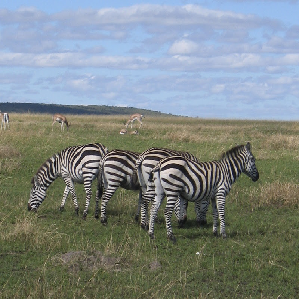

In [116]:
img

In [87]:
#sorted_d

In [88]:
xx = 2
top = images[sorted_d[0][0]]
bottom = images[sorted_d[xx][0]]
this_img = bottom
#this_img = top

In [56]:
this_img

'img100.jpg'

In [57]:
img_path = source_images + this_img
img = image.load_img(img_path, target_size=(299, 299))

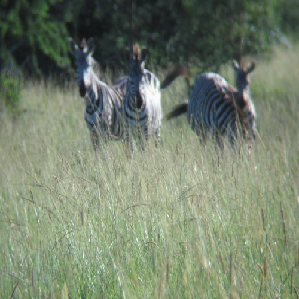

In [58]:
img

## Load filenames

In [43]:
#source_dir = '/Users/tyler/Desktop/dissertation/programming/tcav/cavs/'
path = 'files/f_used_10.pkl'

with open(path, 'rb') as f:
    data = pickle.load(f)
    
image_list = data

In [44]:
image_list

['/home/tyler/Desktop/tcav_on_azure/concepts/zebra/img722.jpg',
 '/home/tyler/Desktop/tcav_on_azure/concepts/zebra/img702.jpg',
 '/home/tyler/Desktop/tcav_on_azure/concepts/zebra/img651.jpg',
 '/home/tyler/Desktop/tcav_on_azure/concepts/zebra/img1010.jpg',
 '/home/tyler/Desktop/tcav_on_azure/concepts/zebra/img791.jpg',
 '/home/tyler/Desktop/tcav_on_azure/concepts/zebra/img1041.jpg',
 '/home/tyler/Desktop/tcav_on_azure/concepts/zebra/img156.jpg',
 '/home/tyler/Desktop/tcav_on_azure/concepts/zebra/img788.jpg',
 '/home/tyler/Desktop/tcav_on_azure/concepts/zebra/img392.jpg',
 '/home/tyler/Desktop/tcav_on_azure/concepts/zebra/img756.jpg',
 '/home/tyler/Desktop/tcav_on_azure/concepts/zebra/img625.jpg',
 '/home/tyler/Desktop/tcav_on_azure/concepts/zebra/img143.jpg',
 '/home/tyler/Desktop/tcav_on_azure/concepts/zebra/img255.jpg',
 '/home/tyler/Desktop/tcav_on_azure/concepts/zebra/img138.jpg',
 '/home/tyler/Desktop/tcav_on_azure/concepts/zebra/img1107.jpg',
 '/home/tyler/Desktop/tcav_on_azure/c

In [27]:
len(image_list)

200

In [28]:
#sorted_d

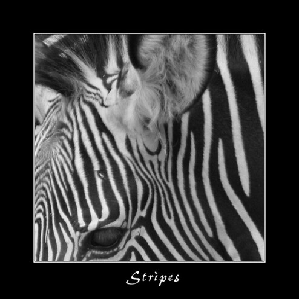

In [83]:
xx = 3
bottom = image_list[sorted_d[xx][0]]
this_img = bottom

img_path = this_img
img = image.load_img(img_path, target_size=(299, 299))

img

In [ ]:
class_acts = acts
for i in range(len(class_acts)):
    print(i)
    act = np.expand_dims(class_acts[i], 0)

In [ ]:
working_dir = '/Users/tyler/Desktop/dissertation/programming/tcav'
activation_dir =  working_dir + '/activations/'
cav_dir = working_dir + '/cavs/'
source_dir = working_dir + '/concepts'

target = 'zebra'
concepts = ['striped'] 
concepts = ['dotted']   

bottlenecks = ['mixed8']


alphas = [0.1]

In [ ]:
activation_dir =  working_dir + '/activations/acts_zebra_mixed9'


with open(activation_dir, 'rb') as f:
    x = np.load(f)
    #data = pickle.load(f)

In [ ]:
x.shape

In [ ]:
#acts

In [ ]:
#images

In [ ]:
source_images

In [ ]:
files = [source_images + i for i in images]
imgs = act_generator.load_images_from_files(files)

In [ ]:
act_zebra.shape

In [ ]:
8 * 8 * 1280

In [ ]:
a = act_dotted[0].reshape(81920)
b = act_zebra[1].reshape(81920)

In [ ]:
cos_sim(a,b)

In [ ]:
cos_sim(dotted_cav,b)

In [ ]:
a = np.ones(4)
b = np.ones(4) * -1
b[3]  = -2

In [ ]:
a

In [ ]:
b

In [ ]:
cos_sim(a,b)

In [ ]:
def cos_sim(a,b):
    return np.dot(a, b)/(norm(a)*norm(b))